## Exploratory Data Analysis

In [2]:
# Importing Libraries
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Loading Datasets
df = pd.read_csv("hf://datasets/lukebarousse/data_jobs/data_jobs.csv")

c:\Users\bunmi\anaconda3\envs\python_course\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   job_title_short        785741 non-null  object 
 1   job_title              785740 non-null  object 
 2   job_location           784696 non-null  object 
 3   job_via                785733 non-null  object 
 4   job_schedule_type      773074 non-null  object 
 5   job_work_from_home     785741 non-null  bool   
 6   search_location        785741 non-null  object 
 7   job_posted_date        785741 non-null  object 
 8   job_no_degree_mention  785741 non-null  bool   
 9   job_health_insurance   785741 non-null  bool   
 10  job_country            785692 non-null  object 
 11  salary_rate            33067 non-null   object 
 12  salary_year_avg        22003 non-null   float64
 13  salary_hour_avg        10662 non-null   float64
 14  company_name           785723 non-nu

In [5]:
#Data Cleaning
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills'] =df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## Filter for United States Data Analyst Roles

In [6]:
df_DA_US =df[(df['job_title_short']== 'Data Analyst') & (df['job_country']=='United States')].copy()

## Filter for Nigeria Data Analyst Roles

In [7]:
df_DA_Nig =df[(df['job_title_short']== 'Data Analyst') & (df['job_country']=='Nigeria')].copy()

# Analysis of the job location

In [8]:
df_DA_US['job_location'].value_counts().head(10)

job_location
Anywhere           5106
New York, NY       3035
Atlanta, GA        2741
Chicago, IL        2337
Austin, TX         1919
Dallas, TX         1862
Washington, DC     1592
Charlotte, NC      1433
Tampa, FL          1431
Los Angeles, CA    1328
Name: count, dtype: int64

In [9]:
df_plot=df_DA_US['job_location'].value_counts().head(10).to_frame()

In [10]:
df_plot

,count
job_location,
Anywhere,5106
"New York, NY",3035
"Atlanta, GA",2741
"Chicago, IL",2337
"Austin, TX",1919
"Dallas, TX",1862
"Washington, DC",1592
"Charlotte, NC",1433
"Tampa, FL",1431


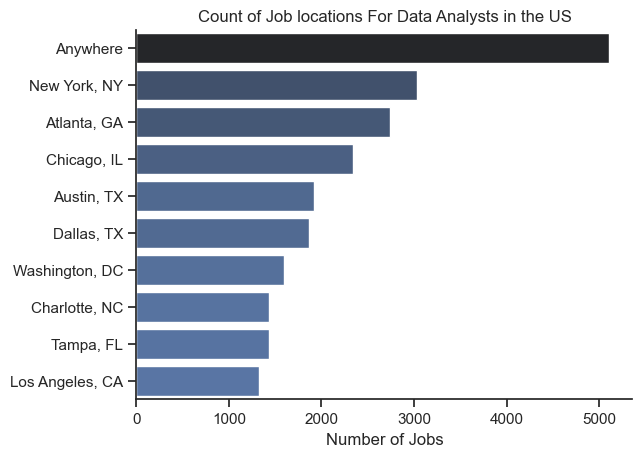

In [11]:
sns.set_theme(style='ticks')

sns.barplot(data=df_plot,x='count',y='job_location',hue='count',palette='dark:b_r',legend=False)
plt.ylabel('')
sns.despine()
plt.xlabel('Number of Jobs')
plt.title('Count of Job locations For Data Analysts in the US')
plt.show()

In [12]:
df_plot1=df_DA_Nig['job_location'].value_counts().head(10).to_frame()

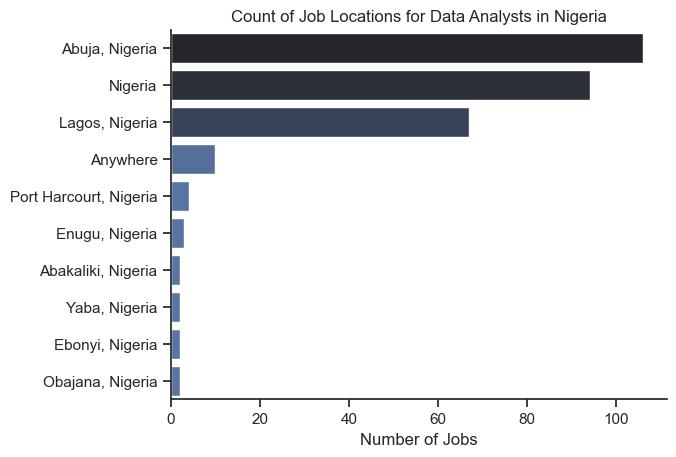

In [13]:
sns.set_theme(style='ticks')
sns.barplot(data=df_plot1,x='count',y='job_location',hue='count',palette='dark:b_r',legend=False)
sns.despine()
plt.ylabel('')
plt.xlabel('Number of Jobs')
plt.title('Count of Job Locations for Data Analysts in Nigeria')
plt.show()


# Analysis of Work From  Home, Job Degree Required and Health Insurance Offered in US

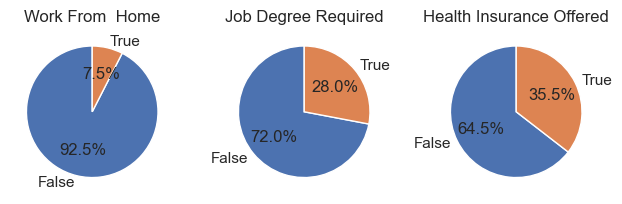

In [14]:
fig, ax = plt.subplots(1,3)

dict_column = {'job_work_from_home': 'Work From  Home',
               'job_no_degree_mention': 'Job Degree Required',
               'job_health_insurance': 'Health Insurance Offered'
              }

for i,(column,title) in enumerate(dict_column.items()):
    #print(i,column,title)
    ax[i].pie(df_DA_US[column].value_counts(),startangle=90, autopct='%1.1f%%',labels=['False','True'])
    ax[i].set_title(title)


fig.tight_layout()
plt.show()

# Analysis of Work From  Home, and Job Degree Required a in Nigeria

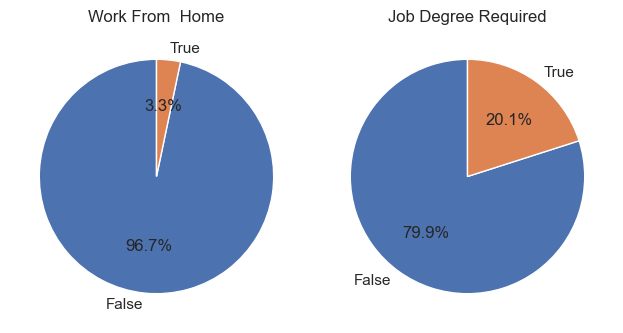

In [15]:
fig, ax = plt.subplots(1,2)

dict_column = {'job_work_from_home': 'Work From  Home',
               'job_no_degree_mention': 'Job Degree Required',
              }

for i,(column,title) in enumerate(dict_column.items()):
    #print(i,column,title)
    ax[i].pie(df_DA_Nig[column].value_counts(),startangle=90, autopct='%1.1f%%',labels=['False','True'])
    ax[i].set_title(title)


fig.tight_layout()
plt.show()

# Analysis of Company Names offering Data Analysts Jobs in the US

In [16]:
df_com_plot=df_DA_US['company_name'].value_counts().head(10).to_frame()

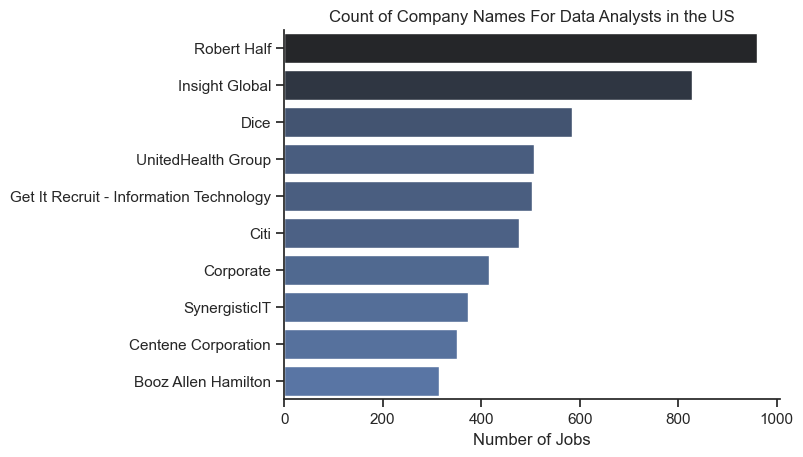

In [17]:
sns.set_theme(style='ticks')

sns.barplot(data=df_com_plot,x='count',y='company_name',hue='count',palette='dark:b_r',legend=False)
plt.ylabel('')
sns.despine()
plt.xlabel('Number of Jobs')
plt.title('Count of Company Names For Data Analysts in the US')
plt.show()

# Analysis of Company Names offering Data Analysts Jobs in Nigeria

In [18]:
df_com_plot1=df_DA_Nig['company_name'].value_counts().head(10).to_frame()

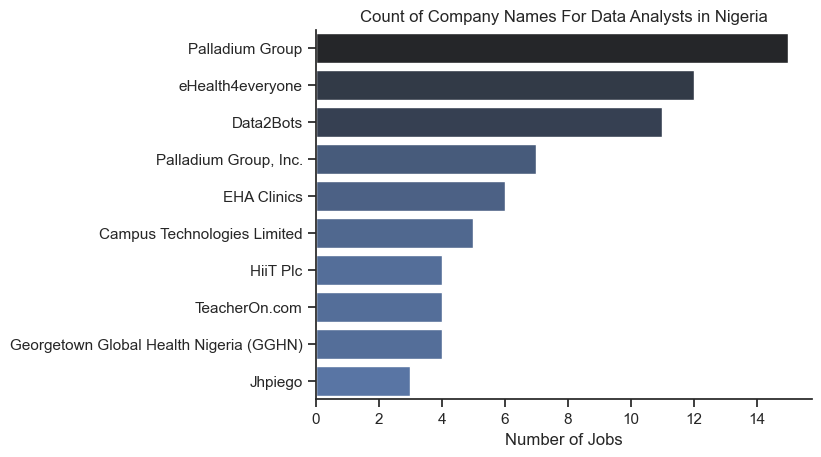

In [19]:
sns.set_theme(style='ticks')

sns.barplot(data=df_com_plot1,x='count',y='company_name',hue='count',palette='dark:b_r',legend=False)
plt.ylabel('')
sns.despine()
plt.xlabel('Number of Jobs')
plt.title('Count of Company Names For Data Analysts in Nigeria')
plt.show()

##What are the most demanded skills (in percentage) for the top 3 most popular roles.

In [20]:
df_US =df[df['job_country'] == 'United States'].copy()

In [21]:
df_skills= df_US.explode('job_skills')

In [22]:
df_skills[['job_title_short','job_skills']]

,job_title_short,job_skills
0,Senior Data Engineer,NaN
3,Data Engineer,python
3,Data Engineer,c++
3,Data Engineer,java
3,Data Engineer,matlab
...,...,...
785692,Data Scientist,r
785703,Data Analyst,NaN
785705,Data Analyst,sql
785705,Data Analyst,python


In [23]:
df_skills_count=df_skills.groupby(['job_title_short','job_skills']).size().reset_index(name='skill_count')

In [24]:
df_skills_count.sort_values(by='skill_count', ascending=False,inplace=True)

In [25]:
df_skills_count

,job_title_short,job_skills,skill_count
886,Data Scientist,python,42379
472,Data Analyst,sql,34452
921,Data Scientist,sql,30034
351,Data Analyst,excel,27519
890,Data Scientist,r,26022
...,...,...,...
1313,Senior Data Engineer,asp.net core,1
228,Cloud Engineer,ms access,1
1020,Machine Learning Engineer,graphql,1
1582,Senior Data Scientist,mariadb,1


In [26]:
df_skills_count['job_title_short'].unique().tolist()

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Analyst',
 'Senior Data Engineer',
 'Business Analyst',
 'Software Engineer',
 'Machine Learning Engineer',
 'Cloud Engineer']

In [27]:
job_titles=df_skills_count['job_title_short'].unique().tolist()[0:3]

In [28]:
job_titles=sorted(job_titles)

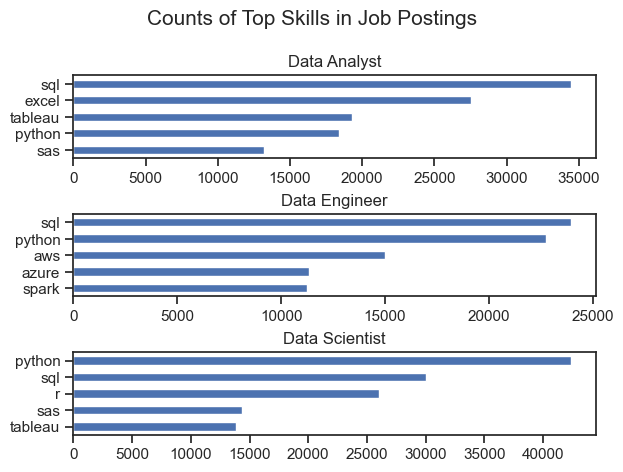

In [29]:
fig, ax = plt.subplots(len(job_titles),1)

for i, job_title in enumerate(job_titles):
    df_plot2 = df_skills_count[df_skills_count['job_title_short']== job_title].head(5)
    df_plot2.plot(kind='barh',y='skill_count', x='job_skills',ax=ax[i],title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15)
plt.tight_layout(h_pad=0.5)


In [30]:
df_plot2

,job_title_short,job_skills,skill_count
886,Data Scientist,python,42379
921,Data Scientist,sql,30034
890,Data Scientist,r,26022
902,Data Scientist,sas,14340
932,Data Scientist,tableau,13859


In [31]:
df_skills_count

,job_title_short,job_skills,skill_count
886,Data Scientist,python,42379
472,Data Analyst,sql,34452
921,Data Scientist,sql,30034
351,Data Analyst,excel,27519
890,Data Scientist,r,26022
...,...,...,...
1313,Senior Data Engineer,asp.net core,1
228,Cloud Engineer,ms access,1
1020,Machine Learning Engineer,graphql,1
1582,Senior Data Scientist,mariadb,1


 We need to get how many job posting we have for data analyst, data scientist, data engineer etc.
 then we get the percentage of skill in job posting

In [35]:
df_job_title_count=df_US['job_title_short'].value_counts().reset_index(name='jobs_total')

In [37]:
skill_job_perc = pd.merge(df_skills_count,df_job_title_count,how='left',on='job_title_short')

In [39]:
skill_job_perc['skill_percent']= 100*skill_job_perc['skill_count']/skill_job_perc['jobs_total']

In [40]:
skill_job_perc

,job_title_short,job_skills,skill_count,jobs_total,skill_percent
0,Data Scientist,python,42379,58830,72.036376
1,Data Analyst,sql,34452,67816,50.802171
2,Data Scientist,sql,30034,58830,51.052184
3,Data Analyst,excel,27519,67816,40.578919
4,Data Scientist,r,26022,58830,44.232534
...,...,...,...,...,...
1865,Senior Data Engineer,asp.net core,1,9289,0.010765
1866,Cloud Engineer,ms access,1,423,0.236407
1867,Machine Learning Engineer,graphql,1,921,0.108578
1868,Senior Data Scientist,mariadb,1,12946,0.007724


In [45]:
df_plot2 = skill_job_perc[skill_job_perc['job_title_short']== job_title].head(5)
df_plot2

,job_title_short,job_skills,skill_count,jobs_total,skill_percent
0,Data Scientist,python,42379,58830,72.036376
2,Data Scientist,sql,30034,58830,51.052184
4,Data Scientist,r,26022,58830,44.232534
10,Data Scientist,sas,14340,58830,24.375319
11,Data Scientist,tableau,13859,58830,23.557709


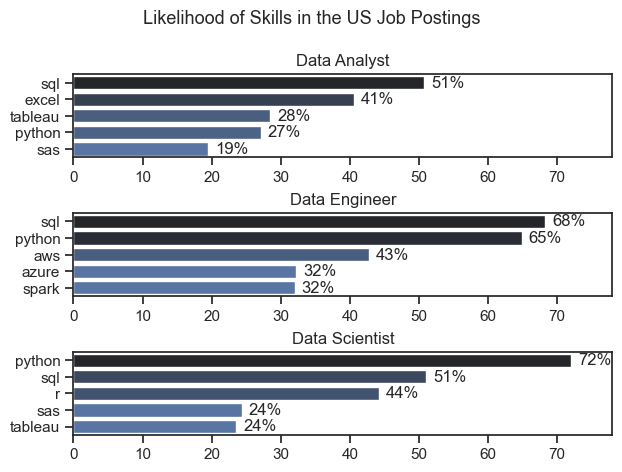

In [59]:
fig, ax = plt.subplots(len(job_titles),1)

for i, job_title in enumerate(job_titles):
    df_plot2 = skill_job_perc[skill_job_perc['job_title_short']== job_title].head(5)
    #df_plot2.plot(kind='barh',y='skill_percent', x='job_skills',ax=ax[i],title=job_title)
    sns.barplot(data=df_plot2,y='job_skills',x='skill_percent',ax=ax[i],hue='skill_count',palette='dark:b_r')
    #ax[i].invert_yaxis()
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0,78)
    for n, v in enumerate(df_plot2['skill_percent']):
        ax[i].text(v +1 ,n, f'{v:.0f}%',va='center')
fig.suptitle('Likelihood of Skills in the US Job Postings', fontsize=13)
plt.tight_layout(h_pad=0.5)

using plt.text() to label different data points
Loop through df.plot going through the skill_perc column so we can get the values from there and then plot it. The loop will be inside our loop already